In [2]:
import os
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
cwd="/content/drive/MyDrive/Colab Notebooks/For NTI/NLP"
os.chdir(cwd)

In [4]:
import os, io, struct, json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import uuid
from time import sleep
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

##Import and explore data

In [5]:
df=pd.read_csv('1429_2.csv',header=0)
pd.set_option('display.max_colwidth', 150)
df.head()

,reviews.rating,reviews.text
0,5.0,This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.
1,5.0,great for beginner or experienced person. Bought as a gift and she loves it
2,5.0,"Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already..."
3,4.0,I've had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love ...
4,5.0,"I bought this for my grand daughter when she comes over to visit. I set it up with her as the user, entered her age and name and now Amazon makes ..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.rating  34627 non-null  float64
 1   reviews.text    34659 non-null  object 
dtypes: float64(1), object(1)
memory usage: 541.7+ KB


In [7]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34626 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.rating  34626 non-null  float64
 1   reviews.text    34626 non-null  object 
dtypes: float64(1), object(1)
memory usage: 811.5+ KB


In [8]:
df['reviews.rating'].value_counts()

5.0    23774
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

##Process data 

In [9]:
def normalize_text(content):
    text = re.sub(r"http\S+", "", content ) # Remove urls
    text = text.lower() # Lowercase 
    text = text.strip() # Remove leading/trailing whitespace
    text = re.sub('\s+', ' ', text) # Remove extra space and tabs
    text = re.sub('\n',' ',text) # remove newlines
    text = re.compile('<.*?>').sub('', text) # Remove HTML tags/markups:
    return text

In [10]:
# Use a tokenizer from the NLTK library
import nltk
from nltk.tokenize import word_tokenize
def Stopword_removal(text):
  filtered_sentence = []

  # Stopword lists can be adjusted for your problem
  stopwords = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]

  # Tokenize the sentence
  words = word_tokenize(text)
  for w in words:
      if w not in stopwords:
          filtered_sentence.append(w)
  text = " ".join(filtered_sentence)
  return text

In [11]:
# Use a tokenizer and stemmer from the NLTK library
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
# Initialize the stemmer
snow = SnowballStemmer('english')

def Stemming(text):
  stemmed_sentence = []
  # Tokenize the sentence
  words = word_tokenize(text)
  for w in words:
      # Stem the word/token
      stemmed_sentence.append(snow.stem(w))
  text = " ".join(stemmed_sentence)
  return text

In [12]:
%%time
df['reviews.text'] = df['reviews.text'].apply(normalize_text)

CPU times: user 461 ms, sys: 6.89 ms, total: 468 ms
Wall time: 473 ms


In [13]:
%%time
df['reviews.text'] = df['reviews.text'].apply(Stopword_removal)

CPU times: user 10.7 s, sys: 40.5 ms, total: 10.7 s
Wall time: 10.8 s


In [14]:
%%time
df['reviews.text'] = df['reviews.text'].apply(Stemming)

CPU times: user 21.8 s, sys: 59.1 ms, total: 21.8 s
Wall time: 24.2 s


In [15]:
pd.set_option('display.max_colwidth', 200)
df.head()

,reviews.rating,reviews.text
0,5.0,product so far has not disappoint . my children love use i like abil monitor control what content they see with eas .
1,5.0,great for beginn or experienc person . bought as gift she love
2,5.0,"inexpens tablet for him use learn on , step up from nabi . he was thrill with , learn how skype on alreadi ..."
3,4.0,i ve had my fire hd 8 two week now i love . tablet great value.w are prime member where tablet shine . i love be abl easili access all of prime content as well as movi you can download watch later...
4,5.0,"i bought for my grand daughter when she come over visit . i set up with her as user , enter her age name now amazon make sure she onli access site content are appropri her age . simpl do she love ..."


In [16]:
df['reviews.rating'].value_counts()

5.0    23774
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

In [17]:
mapper = {1:0 ,2:0 ,3:1 ,4:1 ,5:1}
df['reviews.rating']=df['reviews.rating'].replace(mapper).astype('int')
df['reviews.rating'].value_counts()

1    33814
0      812
Name: reviews.rating, dtype: int64

###Split data 




In [18]:
from sklearn.model_selection import train_test_split

X=df['reviews.text']
y=df['reviews.rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, shuffle= True, stratify=df['reviews.rating'])

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(27700,)
(6926,)
(27700,)
(6926,)


###Data Vectorization using CountVectorizer

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=100)
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.fit_transform(X_test)
print(X_train.shape)
print(X_test.shape)


(27700, 100)
(6926, 100)


###using RandomOverSampler algorithm to balance data

In [21]:
from imblearn.over_sampling import RandomOverSampler 
 
ROS = RandomOverSampler(sampling_strategy=1) 
X_train_ros, y_train_ros = ROS.fit_resample(X_train, y_train) 
from collections import Counter 
Counter(y_train_ros)

Counter({1: 27050, 0: 27050})

In [22]:
print(X_train_ros.shape)
print(y_train_ros.shape)

(54100, 100)
(54100,)


## Train 

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_ros, y_train_ros)
rf.score(X_train_ros, y_train_ros)

0.998909426987061

##predictions And Evaluation

In [24]:
predictions=rf.predict(X_test)


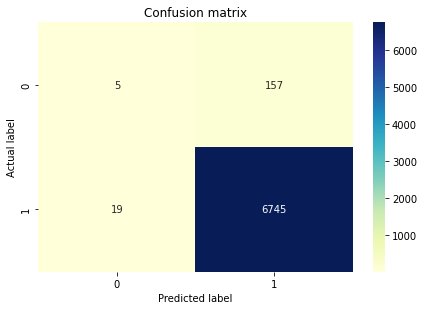

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

cf_matrix = confusion_matrix(y_test,predictions)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.21      0.03      0.05       162
           1       0.98      1.00      0.99      6764

    accuracy                           0.97      6926
   macro avg       0.59      0.51      0.52      6926
weighted avg       0.96      0.97      0.97      6926



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


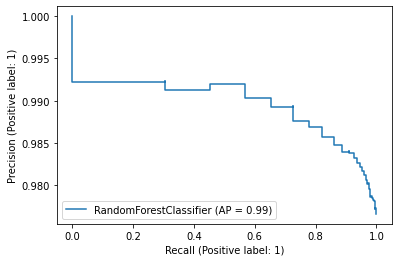

In [27]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(rf, X_test, y_test)
